<a href="https://colab.research.google.com/github/Freitashbruno/Portfolio/blob/master/An%C3%A1lise_do_componente_principal(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Componente de análise principal - PCA


A Análise de Componentes Principais (em inglês PCA) é o nome comum dado à técnica que usa princípios de álgebra linear para transformar variáveis, possivelmente correlacionadas, em um número menor de variáveis chamadas de Componentes Principais (novamente em inglês PC).

A PCA é usada em diversas aplicações, desde a compressão de dados (MP3, JPG) até remoção de ruídos, passando pela análises de grande quantidade de dados.

fonte: https://ocefpaf.github.io/python4oceanographers/blog/2014/12/01/PCA/#:~:text=A%20An%C3%A1lise%20de%20Componentes%20Principais,(novamente%20em%20ingl%C3%AAs%20PC).


O Método de PCA facilita a criação de modelo para os dados estudados, pois simplifica o referido modelo ao descartar dimensões desnecessárias para a análise. Eliminam-se variáveis que serviriam apenas para a geração de ruídos.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Análise do grau de influência das varáveis na simplificação do produto ao modelo. Para isto, utilizaremos um conjuntos de dados de câncer de pulmão que fica dentro sklearn.datasets

Primeiro se inicia a importação das bibliotecas necessárias


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

Agora importação dos dados em si.

In [ ]:
from sklearn.datasets import load_breast_cancer

Depois de importada a classe, inicia-se através de seu construtor.

In [ ]:
cancer =  load_breast_cancer()

Temos agora uma instância da load_breast_cancer que se comporta como um dicionário.

In [ ]:
type(cancer)

sklearn.utils.Bunch

Através da consulta do método keys, podemos consultar algumas informações da instância de classe.

In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

O objetivo conclusivo do paciente de Maligno ou benigno

In [ ]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

Criação do Dataframe

In [ ]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

Visulização do cabeçalho

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Convencionar os dados para visualiação de apenas 2 componentes

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler  = StandardScaler()

Ajustar o dataframe

In [ ]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

Treinamento do StandardScaler

In [ ]:
scaled_data = scaler.transform(df)

Transformação do dados treinados - Aplicação do PCA

In [ ]:
from sklearn.decomposition import PCA

Instanciar objeto PCA

In [ ]:
pca = PCA(n_components=2)

Treinamento do PCA

In [ ]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Transformação dos dados

In [ ]:
x_pca  = pca.transform(scaled_data)

Verificação da forma dos dados

In [ ]:
x_pca.shape

(569, 2)

Percebe-se redução de de 569/30 para 569/2 parâmetros

In [ ]:
scaled_data.shape

(569, 30)

Visualização dos componentes

Text(0, 0.5, 'Segundo Componente Principal')

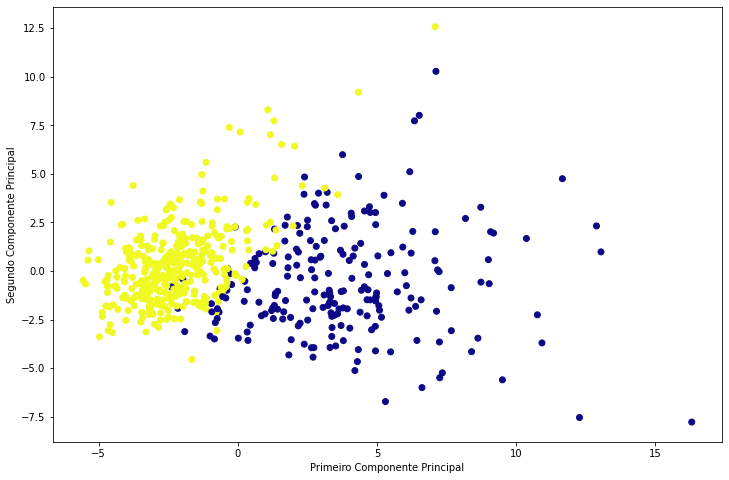

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer['target'], cmap='plasma' )
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')

Entendimento do significado dos componentes

Os valores abaixo mostram a correlação das variáveis com o componente

In [ ]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [ ]:
pca.components_.shape

(2, 30)

Visualização por meio do Mapa de calor "heatmap"

In [ ]:
df_comp = pd.DataFrame(pca.components_, columns=cancer['feature_names'])

Vamos ver então qual a correlação entre cada um destes valores das informações das colunas e o respectivo componente acima

In [ ]:
df_comp.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,0.205979,0.017428,0.211326,0.202870,0.014531,0.170393,0.153590,0.183417,0.042498,0.102568,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,-0.105552,0.089980,-0.089457,-0.152293,0.204430,0.232716,0.197207,0.130322,0.183848,0.280092,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


O próximo passo é visualizar o dataframe ao utilizar o heatmap


O gráfico apresenta todos as correlações  entre todos os parâmetros e todos componentes.



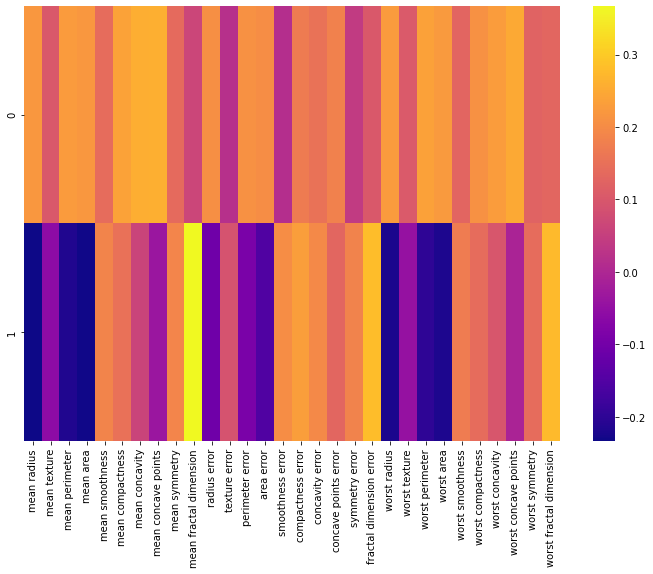

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_comp, cmap='plasma')
